### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

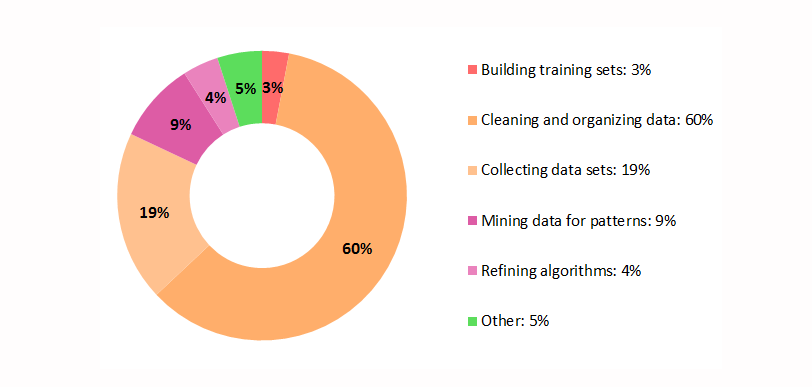




In [63]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import statsmodels.api as sm  
from datetime import datetime
import math
import scipy as sp
import sklearn
from sklearn.neural_network import MLPRegressor

In [1]:
# Read in the data
SHARE_PRICES = pd.read_csv("lstmmodel/SharePrice.csv").dropna(subset=['Date'])
SHARE_PRICES['Date'] = pd.to_datetime(SHARE_PRICES['Date'])

# group the dataframe by week and aggregate the data
SHARE_PRICES = SHARE_PRICES.groupby(pd.Grouper(key='Date', freq='W-MON')).mean()

# Perform backward fill
SHARE_PRICES = SHARE_PRICES.fillna(method='bfill')
SHARE_PRICES.head()

,SWL,ALW,GCB,SCB,GGBL,MLC,PBC,UNIL,HFC,CMLT,FML
Date,,,,,,,,,,,
1990-11-12,264.0,1412.5,547.0,200.0,83.0,52.0,515.0,1800.0,103.0,413.333333,25.0
1990-11-19,264.0,1412.5,547.0,200.0,85.0,52.0,515.0,1625.0,103.0,413.333333,25.0
1990-11-26,264.0,1412.5,547.0,200.0,85.0,52.0,515.0,1625.0,103.0,413.333333,25.0
1990-12-03,264.0,1412.5,547.0,255.0,85.0,52.0,515.0,1655.0,103.0,413.333333,25.0
1990-12-10,264.0,1412.5,547.0,261.5,79.5,52.0,515.0,1652.5,103.0,413.333333,24.5


In [2]:
# convert Date column to datetime format and set it as the index
SHARE_PRICES = SHARE_PRICES.sort_values(by=['Date'], ascending=[True])
# SHARE_PRICES.to_csv(f'lstmmodel/SHARE_PRICES.csv', index=False)

In [3]:
# SHARE_PRICES = SHARE_PRICES.resample('D').ffill()
# # print the timeseries
# SHARE_PRICES.head()

Missing value imputation using the Kalman filter method provided by the` imputeTS` package. It checks if there are any missing values in the SHARE_PRICES dataframe and, if there are, it applies the na_kalman function to impute those missing values. The model argument is set to `"auto.arima"`, which means that the function will automatically select the best ARIMA model to use for imputation. The smooth argument is set to TRUE, which means that the imputed values will be smoothed using the Kalman filter. If there are no missing values in the dataframe, the function simply returns the original SHARE_PRICES dataframe without performing any imputation.

In [4]:

# Check for missing values
print('missing values:', SHARE_PRICES.isnull().sum().sort_values(ascending = False))

missing values: SWL     0
ALW     0
GCB     0
SCB     0
GGBL    0
MLC     0
PBC     0
UNIL    0
HFC     0
CMLT    0
FML     0
dtype: int64


In [5]:
# Divide each row of the data frame by 1000, 
SHARE_PRICES.iloc[0:921, 0:11] = SHARE_PRICES.iloc[0:921, 0:11] / 10000
# Drop some columns that are not needed
SHARE_PRICES=SHARE_PRICES.drop(['SCB','SWL','CMLT','PBC','ALW','MLC'], axis=1)
SHARE_PRICES.head()

,GCB,GGBL,UNIL,HFC,FML
Date,,,,,
1990-11-12,0.0547,0.00830,0.18000,0.0103,0.00250
1990-11-19,0.0547,0.00850,0.16250,0.0103,0.00250
1990-11-26,0.0547,0.00850,0.16250,0.0103,0.00250
1990-12-03,0.0547,0.00850,0.16550,0.0103,0.00250
1990-12-10,0.0547,0.00795,0.16525,0.0103,0.00245


In [6]:
SHARE_PRICES.tail()

,GCB,GGBL,UNIL,HFC,FML
Date,,,,,
2020-11-09,4.46,1.466667,13.980,0.493333,3.506667
2020-11-16,4.52,1.455000,13.985,0.515000,3.565000
2020-11-23,4.52,1.455000,13.985,0.515000,3.565000
2020-11-30,4.52,1.455000,13.985,0.515000,3.565000
2020-12-07,4.52,1.455000,13.985,0.515000,3.565000


In [7]:
SHARE_PRICES.columns

Index(['GCB', 'GGBL', 'UNIL', 'HFC', 'FML'], dtype='object')

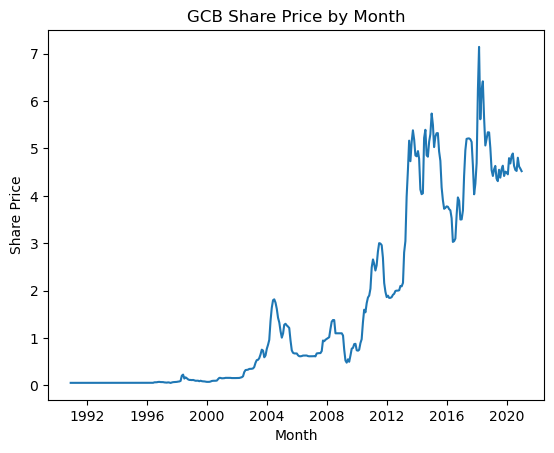

In [8]:
import matplotlib.pyplot as plt

# resample data based on monthly frequency and compute the mean of each month
monthly_data = SHARE_PRICES.resample('M').mean()

# plot the data
plt.plot(monthly_data.index, monthly_data['GCB'])
plt.xlabel('Month')
plt.ylabel('Share Price')
plt.title('GCB Share Price by Month')
plt.show()


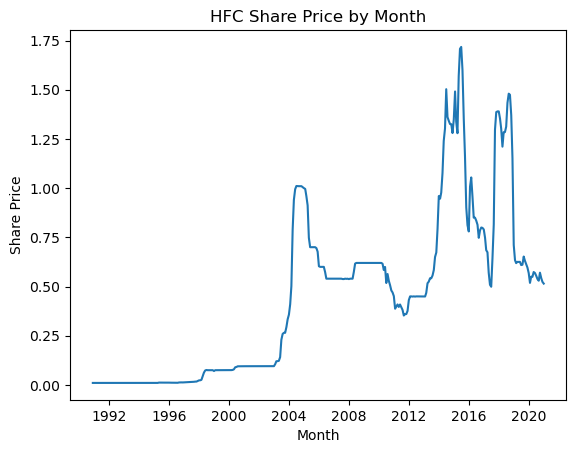

In [9]:
# plot the data
plt.plot(monthly_data.index, monthly_data['HFC'])
plt.xlabel('Month')
plt.ylabel('Share Price')
plt.title('HFC Share Price by Month')
plt.show()

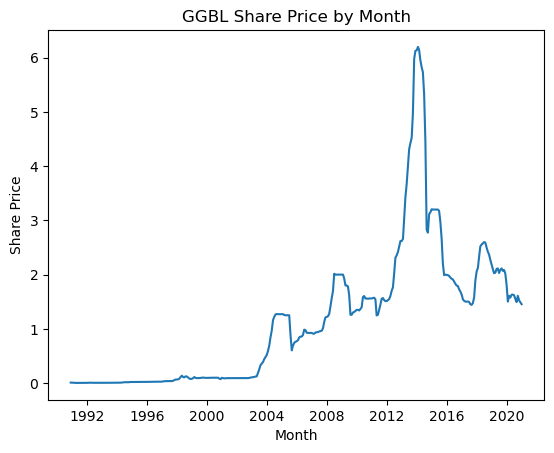

In [10]:
# plot the data
plt.plot(monthly_data.index, monthly_data['GGBL'])
plt.xlabel('Month')
plt.ylabel('Share Price')
plt.title('GGBL Share Price by Month')
plt.show()

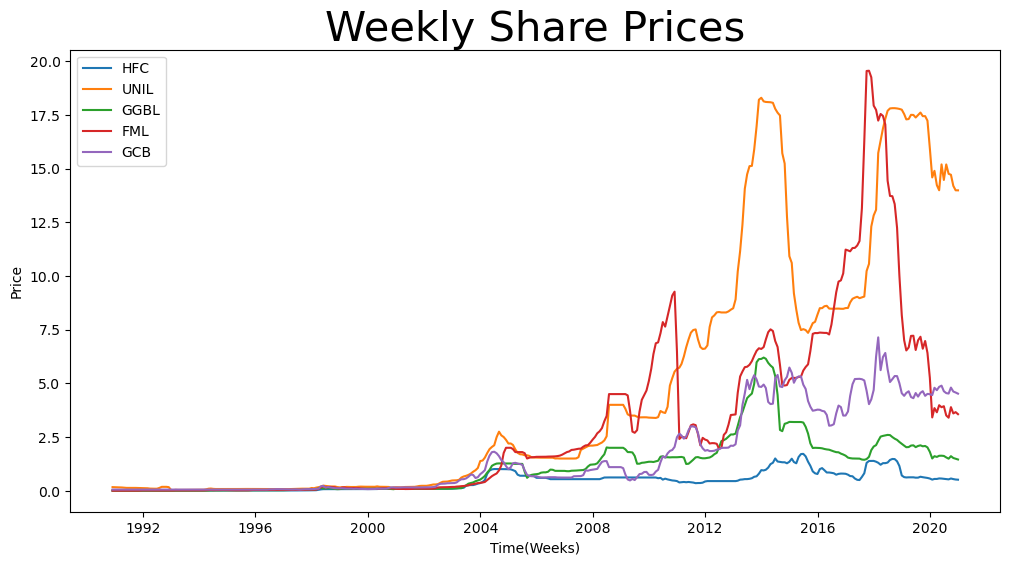

In [11]:
import matplotlib.pyplot as plt

# Resample the data by month
ts_monthly = SHARE_PRICES.resample('M').mean()

# Plot all variables on one plot
plt.figure(figsize=(12, 6))
plt.plot(ts_monthly.index, ts_monthly['HFC'], label='HFC')
plt.plot(ts_monthly.index, ts_monthly['UNIL'], label='UNIL')
plt.plot(ts_monthly.index, ts_monthly['GGBL'], label='GGBL')
plt.plot(ts_monthly.index, ts_monthly['FML'], label='FML')
plt.plot(ts_monthly.index, ts_monthly['GCB'], label='GCB')
plt.legend()
plt.xlabel('Time(Weeks)')
plt.ylabel('Price')
plt.title('Weekly Share Prices', fontsize=30)
plt.show()



In [12]:
SHARE_PRICES.shape

(1570, 5)

In [13]:
FML_SHARE_PRICES = SHARE_PRICES['FML']

<AxesSubplot:xlabel='Date'>

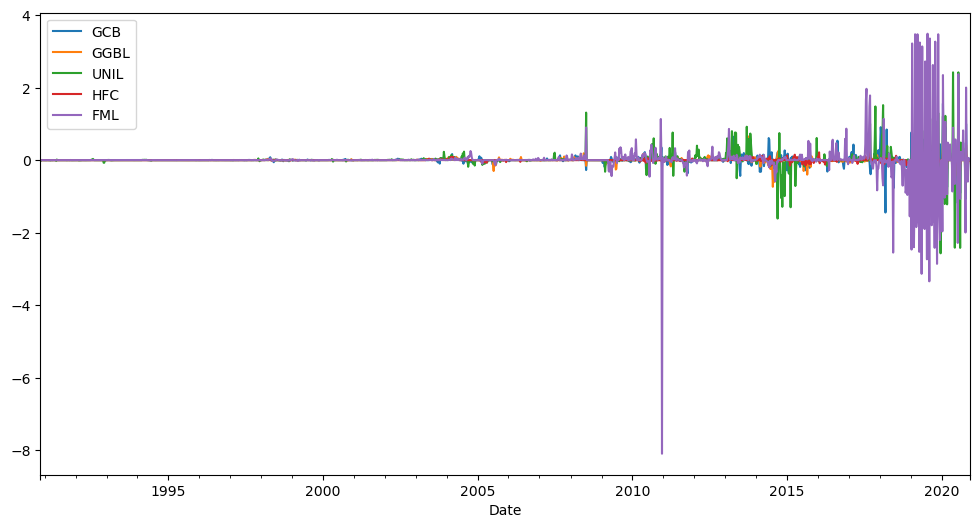

In [14]:
SHARE_PRICES = SHARE_PRICES.diff()
SHARE_PRICES.plot(figsize=(12, 6))


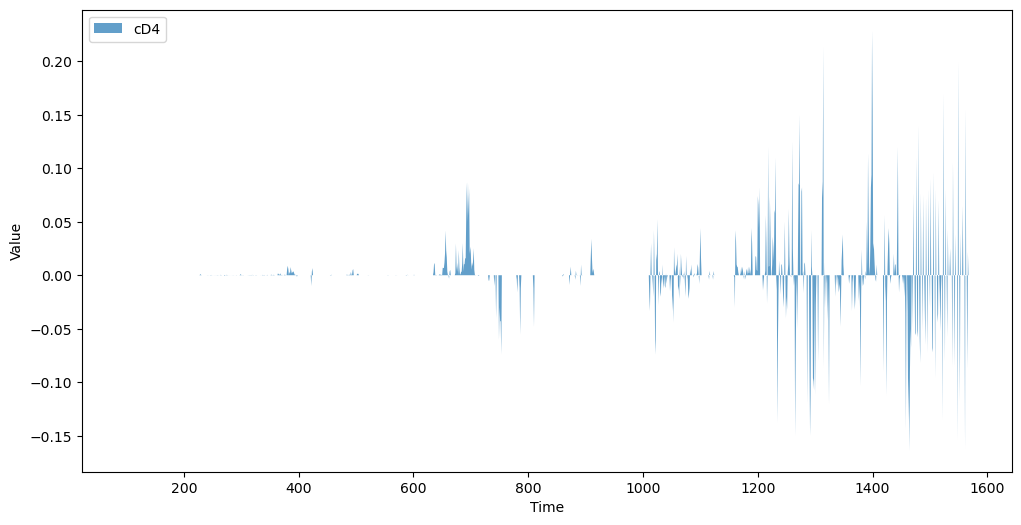

In [15]:
import pywt
# Define wavelet decomposition function
def wavelet_decomposition(series, wavelet='db4', level=4):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(series, wavelet, level=level)
    # Reconstruct the approximations and details
    cA = [coeffs[0]]
    cD = []
    for i in range(level):
        cD.append(coeffs[i+1])
        cA.append(pywt.waverec([cA[i], coeffs[i+1]], wavelet))
    return cA[1:], cD[::-1]

# Define function to plot wavelet coefficients
def plot_wavelet_coeffs(cA, cD, labels):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.stackplot(range(len(cA[-1])), cA[-1], labels=labels, alpha=0.7)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend(loc='upper left')
    plt.show()

# Example usage with HFC stock prices
cA, cD = wavelet_decomposition(SHARE_PRICES['HFC'])
plot_wavelet_coeffs(cA, cD, ['cD4', 'cD3', 'cD2', 'cD1', 'cA4'])


We can create a function that takes in the wavelet decomposed data and applies the LSTM model to each of the sub-series.

## Maximum decomposition level
First, we check how many levels of the signal can be decomposed into.


In [16]:

w = pywt.Wavelet('db6')
l = len(FML_SHARE_PRICES)
f_l = w.dec_len

max_l = pywt.dwt_max_level(data_len=l, filter_len=f_l)

print(max_l)

7


In [17]:
w = pywt.Wavelet('db6')
l = len(SHARE_PRICES)
f_l = w.dec_len

max_2 = pywt.dwt_max_level(data_len=l, filter_len=f_l)

print(max_2)

7


Thus, we can decompose to the maximum 7 levels.

In [75]:
# Save it for Modeling
FML_SHARE_PRICES.to_csv(f'lstmmodel/To_be_dc.csv')